In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Employee.csv')

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


No null values

In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# EDA

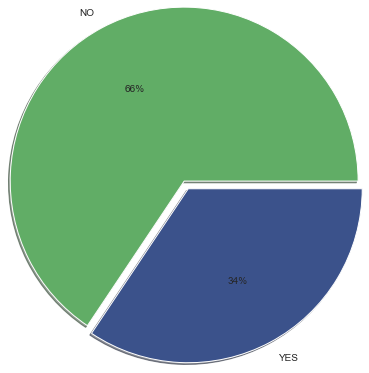

In [6]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
#to see the composition of LeaveOrNot
out_df=pd.DataFrame(df.groupby('LeaveOrNot')['LeaveOrNot'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['LeaveOrNot'],labels=['NO','YES'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

Imbalanced dataset

## Education

In [7]:
d1=pd.DataFrame(df.groupby(['Education','LeaveOrNot'])['Education'].count())
d1

Education
Education LeaveOrNot           
Bachelors 0                2472
          1                1129
Masters   0                 447
          1                 426
PHD       0                 134
          1                  45

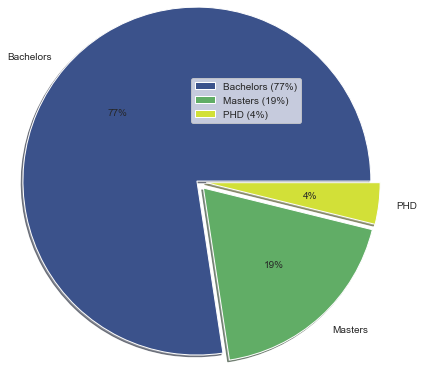

In [8]:
#to see the composition of education
out_df=pd.DataFrame(df.groupby('Education')['Education'].count())
colors = ['#3b528b','#61ad66','#d2e038']
plt.pie(out_df['Education'],labels=['Bachelors','Masters','PHD'],autopct='%.0f%%',colors=colors,radius=2,explode = (0.01,0.1, 0.1),shadow=True)
plt.legend(['Bachelors (77%)','Masters (19%)','PHD (4%)'], loc="best")
plt.show()

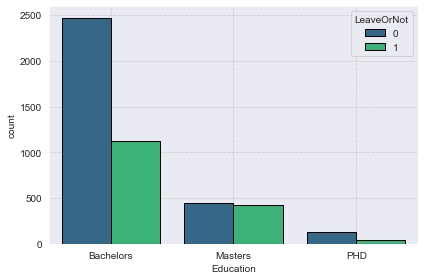

In [9]:
sns.countplot(df['Education'],hue=df['LeaveOrNot'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [10]:
prop_df=[]
for val in np.sort(df['Education'].unique()):
    prop=d1['Education'][val][1]/(d1['Education'][val][1]+d1['Education'][val][0])
    prop_df.append({
        'Education':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,Education,proportion
1,Masters,0.487973
0,Bachelors,0.313524
2,PHD,0.251397


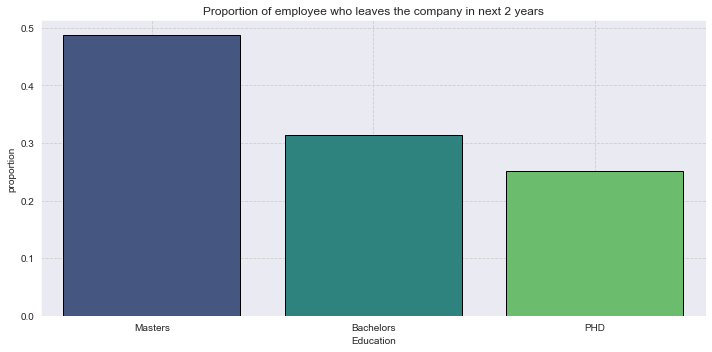

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['Education'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['Education'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('Education')
plt.tight_layout()
plt.grid(True)
plt.show()

* Here we can see that employees with masters degree are more likely to leave the organisation. And employees with PHD degree are more likely to leave.

## JoiningYear

In [12]:
d1=pd.DataFrame(df.groupby(['JoiningYear','LeaveOrNot'])['JoiningYear'].count())
d1

JoiningYear
JoiningYear LeaveOrNot             
2012        0                   395
            1                   109
2013        0                   445
            1                   224
2014        0                   526
            1                   173
2015        0                   463
            1                   318
2016        0                   408
            1                   117
2017        0                   811
            1                   297
2018        0                     5
            1                   362

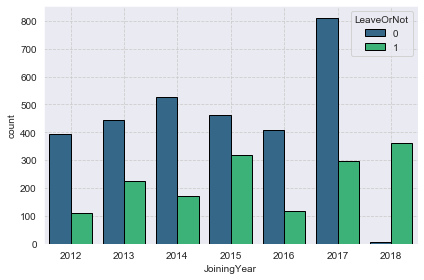

In [13]:
sns.countplot(df['JoiningYear'],hue=df['LeaveOrNot'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [14]:
prop_df=[]
for val in np.sort(df['JoiningYear'].unique()):
    prop=d1['JoiningYear'][val][1]/(d1['JoiningYear'][val][1]+d1['JoiningYear'][val][0])
    prop_df.append({
        'JoiningYear':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,JoiningYear,proportion
6,2018,0.986376
3,2015,0.407170
1,2013,0.334828
5,2017,0.268051
2,2014,0.247496
4,2016,0.222857
0,2012,0.216270


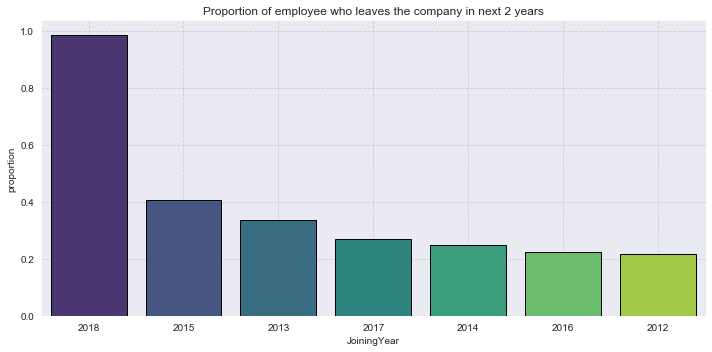

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['JoiningYear'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['JoiningYear'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('JoiningYear')
plt.tight_layout()
plt.grid(True)
plt.show()

From the graph and dataframe we can see that proportion of employee who joined in 2018 leaves the company in next 2 years is most and in 2012 it is least.

## City

In [16]:
d1=pd.DataFrame(df.groupby(['City','LeaveOrNot'])['City'].count())
d1

City
City      LeaveOrNot      
Bangalore 0           1633
          1            595
New Delhi 0            791
          1            366
Pune      0            629
          1            639

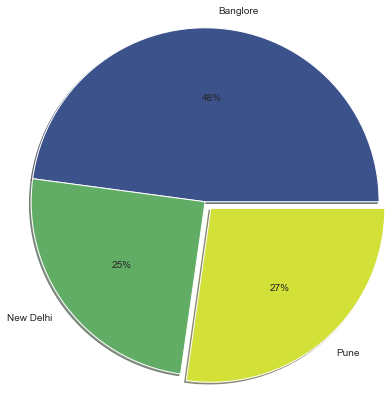

In [17]:
#to see the composition of city
out_df=pd.DataFrame(df.groupby('City')['City'].count())
colors = ['#3b528b','#61ad66','#d2e038']
plt.pie(out_df['City'],labels=['Banglore','New Delhi','Pune'],autopct='%.0f%%',colors=colors,radius=2,explode = (0,0, 0.1),shadow=True)
plt.show()

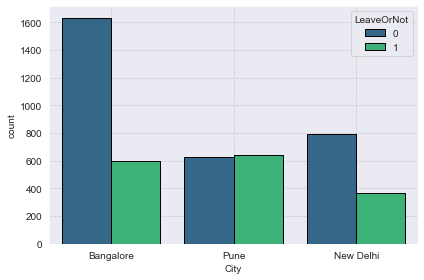

In [18]:
sns.countplot(df['City'],hue=df['LeaveOrNot'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [19]:
prop_df=[]
for val in np.sort(df['City'].unique()):
    prop=d1['City'][val][1]/(d1['City'][val][1]+d1['City'][val][0])
    prop_df.append({
        'City':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,City,proportion
2,Pune,0.503943
1,New Delhi,0.316335
0,Bangalore,0.267056


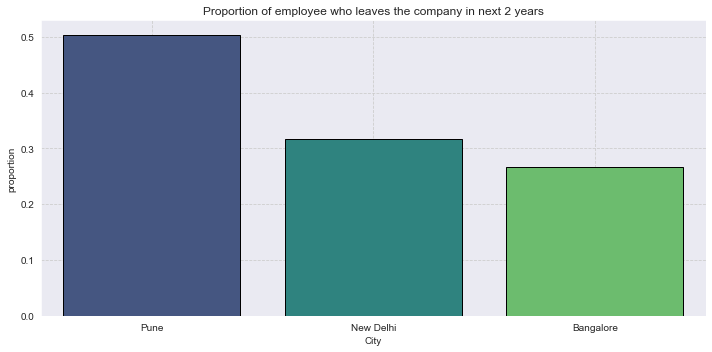

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['City'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['City'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('City')
plt.tight_layout()
plt.grid(True)
plt.show()

Employee from Pune are most likely to leave the company in next 2 years and from Banglore the proportion is least.

## PaymentTier

In [21]:
d1=pd.DataFrame(df.groupby(['PaymentTier','LeaveOrNot'])['PaymentTier'].count())
d1

PaymentTier
PaymentTier LeaveOrNot             
1           0                   154
            1                    89
2           0                   368
            1                   550
3           0                  2531
            1                   961

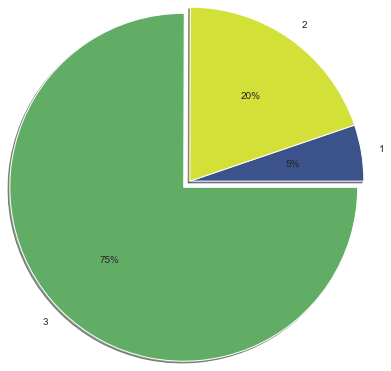

In [22]:
#to see the composition of PaymentTier
out_df=pd.DataFrame(df.groupby('PaymentTier')['PaymentTier'].count())
colors = ['#3b528b','#d2e038','#61ad66']
plt.pie(out_df['PaymentTier'],labels=['1','2','3'],autopct='%.0f%%',colors=colors,radius=2,explode = (0,0, 0.1),shadow=True)
plt.show()

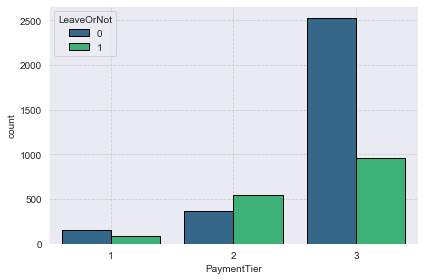

In [23]:
sns.countplot(df['PaymentTier'],hue=df['LeaveOrNot'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [24]:
prop_df=[]
for val in np.sort(df['PaymentTier'].unique()):
    prop=d1['PaymentTier'][val][1]/(d1['PaymentTier'][val][1]+d1['PaymentTier'][val][0])
    prop_df.append({
        'PaymentTier':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,PaymentTier,proportion
1,2,0.599129
0,1,0.366255
2,3,0.275200


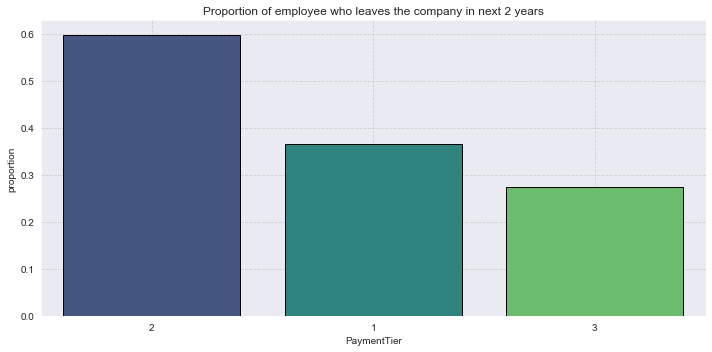

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['PaymentTier'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['PaymentTier'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('PaymentTier')
plt.tight_layout()
plt.grid(True)
plt.show()

Employee from PaymentTier 2 are most likely to leave the company in next 2 years and from PaymentTier 3 the proportion is least.

## Age

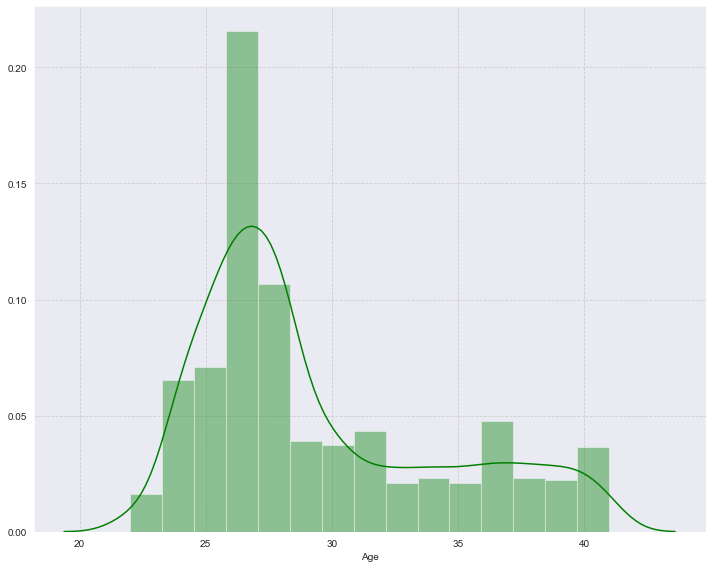

In [26]:
plt.figure(figsize=(10,8))
sns.distplot(df['Age'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.show()

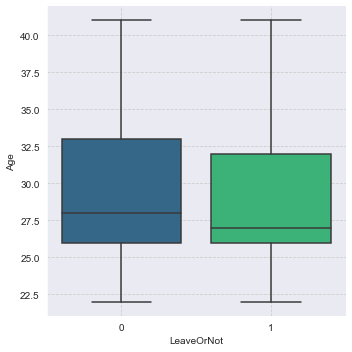

In [27]:
sns.catplot(x='LeaveOrNot',y='Age',kind='box',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

No pattern in Age

## Gender

In [28]:
d1=pd.DataFrame(df.groupby(['Gender','LeaveOrNot'])['Gender'].count())
d1

Gender
Gender LeaveOrNot        
Female 0              991
       1              884
Male   0             2062
       1              716

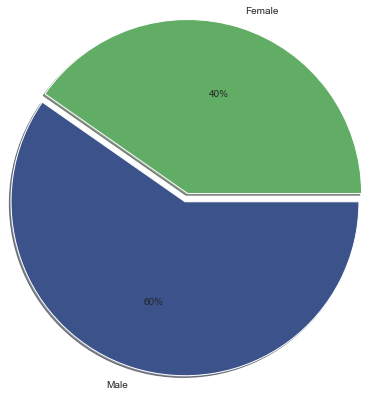

In [29]:
#to see the composition of Gender
out_df=pd.DataFrame(df.groupby('Gender')['Gender'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['Gender'],labels=['Female','Male'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

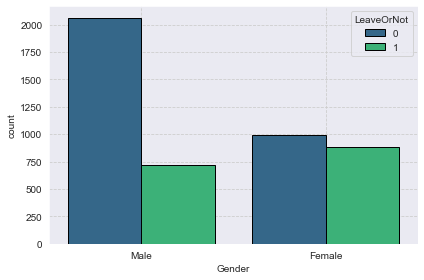

In [30]:
sns.countplot(df['Gender'],hue=df['LeaveOrNot'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [31]:
prop_df=[]
for val in np.sort(df['Gender'].unique()):
    prop=d1['Gender'][val][1]/(d1['Gender'][val][1]+d1['Gender'][val][0])
    prop_df.append({
        'Gender':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,Gender,proportion
0,Female,0.471467
1,Male,0.257739


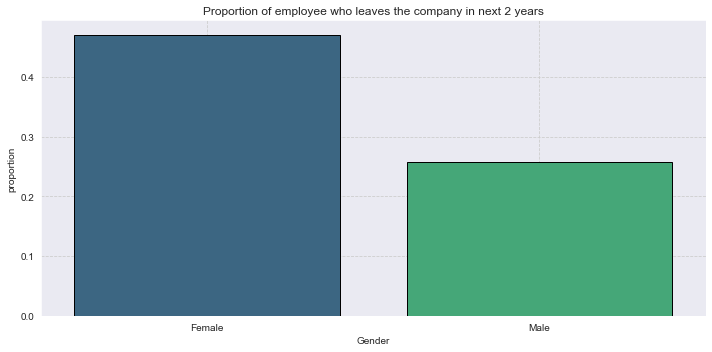

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['Gender'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['Gender'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('Gender')
plt.tight_layout()
plt.grid(True)
plt.show()

We can see that around 50% of females left the company in next two years

## EverBenched

In [33]:
d1=pd.DataFrame(df.groupby(['EverBenched','LeaveOrNot'])['EverBenched'].count())
d1

EverBenched
EverBenched LeaveOrNot             
No          0                  2792
            1                  1383
Yes         0                   261
            1                   217

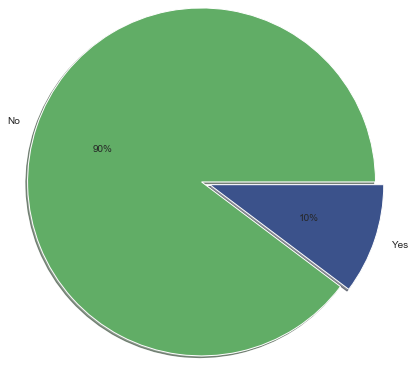

In [34]:
#to see the composition of EverBenched
out_df=pd.DataFrame(df.groupby('EverBenched')['EverBenched'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['EverBenched'],labels=['No','Yes'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

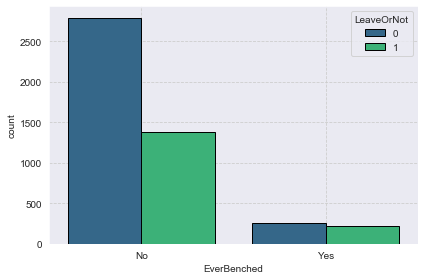

In [35]:
sns.countplot(df['EverBenched'],hue=df['LeaveOrNot'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [36]:
prop_df=[]
for val in np.sort(df['EverBenched'].unique()):
    prop=d1['EverBenched'][val][1]/(d1['EverBenched'][val][1]+d1['EverBenched'][val][0])
    prop_df.append({
        'EverBenched':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,EverBenched,proportion
1,Yes,0.453975
0,No,0.331257


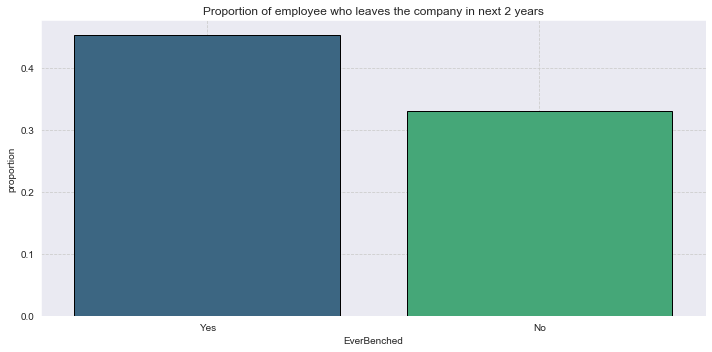

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['EverBenched'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['EverBenched'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('EverBenched')
plt.tight_layout()
plt.grid(True)
plt.show()

45% of employee who were benched left the company.

## ExperienceInCurrentDomain

In [38]:
d1=pd.DataFrame(df.groupby(['ExperienceInCurrentDomain','LeaveOrNot'])['ExperienceInCurrentDomain'].count())
d1

ExperienceInCurrentDomain
ExperienceInCurrentDomain LeaveOrNot                           
0                         0                                 231
                          1                                 124
1                         0                                 370
                          1                                 188
2                         0                                 688
                          1                                 399
3                         0                                 487
                          1                                 299
4                         0                                 634
                          1                                 297
5                         0                                 631
                          1                                 288
6                         0                                   6
                          1                                   2
7                         0                                   6
                          1                                   3

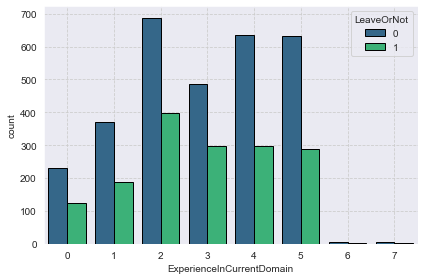

In [39]:
sns.countplot(df['ExperienceInCurrentDomain'],hue=df['LeaveOrNot'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [40]:
prop_df=[]
for val in np.sort(df['ExperienceInCurrentDomain'].unique()):
    prop=d1['ExperienceInCurrentDomain'][val][1]/(d1['ExperienceInCurrentDomain'][val][1]+d1['ExperienceInCurrentDomain'][val][0])
    prop_df.append({
        'ExperienceInCurrentDomain':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,ExperienceInCurrentDomain,proportion
3,3,0.380407
2,2,0.367065
0,0,0.349296
1,1,0.336918
7,7,0.333333
4,4,0.319012
5,5,0.313384
6,6,0.250000


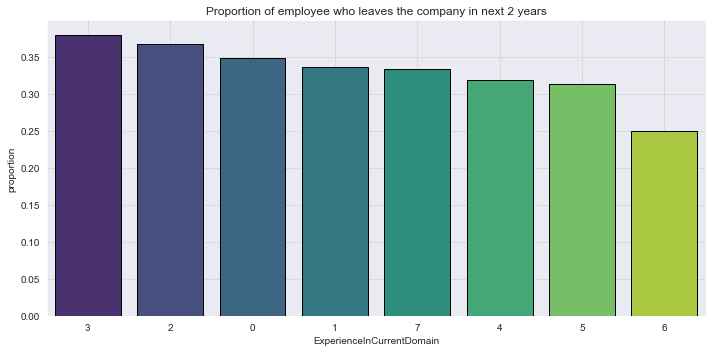

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['ExperienceInCurrentDomain'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['ExperienceInCurrentDomain'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('ExperienceInCurrentDomain')
plt.tight_layout()
plt.grid(True)
plt.show()

Here you can see that , employee with less experience left the company in 2 years.

# EDA Conclusion

## So, which employee is most likely to leave the company :

* In terms of education employees with Masters degree are most likely to leave the company.
* Employees who joined in recent year are most likely to leave the company. Maybe they are not satisfied with thier salary or their department work culture.
* Employee from Pune are most likely to leave.
* In terms of Salary , employee with PaymentTier 2 are most likely to leave.
* Female employee are more likely to leave.
* Most of the employee who were benched left the company.
* As we analysed in joining year the employees with less experience are the one's who are leaving the company.

# Data preprocessing

In [42]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
cat_feature=['Education', 'JoiningYear', 'City', 'PaymentTier', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain']

In [45]:
for col in cat_feature:
    df[col]=le.fit_transform(df[col])

In [46]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,2,34,1,0,0,0
1,0,1,2,0,28,0,0,3,1
2,0,2,1,2,38,0,0,2,0
3,1,4,0,2,27,1,0,5,1
4,1,5,2,2,24,1,1,2,1


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X=df.drop(['LeaveOrNot','ExperienceInCurrentDomain'],axis=1)
y=df.LeaveOrNot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

# Model Fitting

In [49]:
scores=[]

from sklearn.metrics import f1_score

## DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='random')
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')

In [51]:
pred=model.predict(X_test)

scores.append({
        'model': 'DecisionTreeClassifier',
        'score': model.score(X_test,y_test),
        'f1_score' : f1_score(y_test,pred)
    })


model.score(X_test, y_test)


0.8571428571428571

## RandomForestClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=35, random_state=42,criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [53]:
y_predict = model.predict(X_test)

scores.append({
        'model': 'RandomForestClassifier',
        'score': model.score(X_test,y_test),
    'f1_score' : f1_score(y_test,pred)
    })


model.score(X_test, y_test)

0.8571428571428571

## XGBRFClassifier

In [54]:
from xgboost import XGBRFClassifier

model = XGBRFClassifier(eval_metric='mlogloss',
                        random_state=42,
                       learning_rate=0.01,
                       max_depth=10, 
                       scale_pos_weight=1.5)
model.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=0.8, colsample_bytree=1,
                eval_metric='mlogloss', gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.01, max_delta_step=0, max_depth=10,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=4, num_parallel_tree=100,
                objective='binary:logistic', random_state=42, reg_alpha=0,
                reg_lambda=1e-05, scale_pos_weight=1.5, subsample=0.8,
                tree_method='exact', use_label_encoder=True,
                validate_parameters=1, verbosity=None)

In [55]:
pred=model.predict(X_test)

scores.append({
        'model': 'XGBRFClassifier',
        'score': model.score(X_test,y_test),
    'f1_score' : f1_score(y_test,pred)
    })


model.score(X_test, y_test)

0.878625134264232

## KNeighborsClassifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [57]:
pred=model.predict(X_test)

scores.append({
        'model': 'KNeighborsClassifier',
        'score': model.score(X_test,y_test),
    'f1_score' : f1_score(y_test,pred)
    })


model.score(X_test, y_test)

0.8335123523093448

## AdaBoostClassifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [59]:
pred=model.predict(X_test)

scores.append({
        'model': 'AdaBoostClassifier',
        'score': model.score(X_test,y_test),
    'f1_score' : f1_score(y_test,pred)
    })


model.score(X_test, y_test)

0.807733619763695

# Conclusion

In [60]:
Score = pd.DataFrame(scores,columns=['model','score','f1_score'])
Score.sort_values('score',ascending=False,inplace=True)
Score

,model,score,f1_score
2,XGBRFClassifier,0.878625,0.795660
0,DecisionTreeClassifier,0.857143,0.750469
1,RandomForestClassifier,0.857143,0.750469
3,KNeighborsClassifier,0.833512,0.697856
4,AdaBoostClassifier,0.807734,0.644135


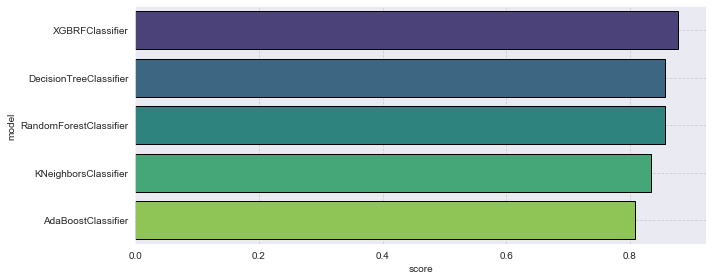

In [61]:
plt.figure(figsize=(10,4))
sns.barplot(y=Score['model'],x=Score['score'],palette='viridis',edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

 **XGBRFClassifier model is the best fit for the data**
 
And we can use this XGBRFClassifier model to predict whether the employee will leave the company or not